In [1]:
from __future__ import print_function
from collections import Counter

import argparse
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR
import time

In [2]:
seed=12345
batch_size=4
test_batch_size=1000
lr=0.001
epochs=50
dry_run=False
log_interval=3000
save_model=False
use_cuda = False
use_mps = False
method = "neglog-dist"

torch.manual_seed(seed)

if use_cuda:
    device = torch.device("cuda")
elif use_mps:
    device = torch.device("mps")
else:
    device = torch.device("cpu")

train_kwargs = {'batch_size': batch_size, 'shuffle': True}
test_kwargs = {'batch_size': test_batch_size}
if use_cuda:
    cuda_kwargs = {'num_workers': 1, 'pin_memory': True, 'shuffle': True}
    train_kwargs.update(cuda_kwargs)
    test_kwargs.update(cuda_kwargs)

train_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
])
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
])
dataset1 = datasets.CIFAR100(
    '.', train=True, download=True, transform=train_transform)
dataset2 = datasets.CIFAR100(
    '.', train=False, download=True, transform=test_transform)
train_loader = torch.utils.data.DataLoader(dataset1,**train_kwargs)
test_loader = torch.utils.data.DataLoader(dataset2, **test_kwargs)



0.0%

100.0%


Extracting ./cifar-100-python.tar.gz to .
Files already downloaded and verified


In [3]:
train_X = []
train_y = []
for dX, dy in train_loader:
    train_X.append(dX)
    train_y.append(dy)  
train_X = torch.concat(train_X, axis=0)
train_y = torch.concat(train_y, axis=0)
train_X_np = train_X.detach().numpy()
train_y_np = train_y.detach().numpy()

test_X = []
test_y = []
for dX, dy in test_loader:
    test_X.append(dX)
    test_y.append(dy)  
test_X = torch.concat(test_X, axis=0)
test_y = torch.concat(test_y, axis=0)
test_X_np = test_X.detach().numpy()
test_y_np = test_y.detach().numpy()

In [4]:
np.save("cifar100_train_X.npy", train_X_np)
np.save("cifar100_train_y.npy", train_y_np)
np.save("cifar100_test_X.npy", test_X_np)
np.save("cifar100_test_y.npy", test_y_np)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

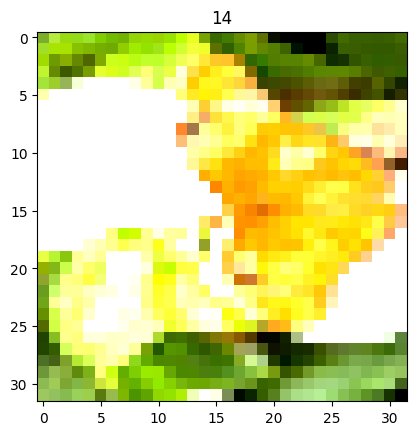

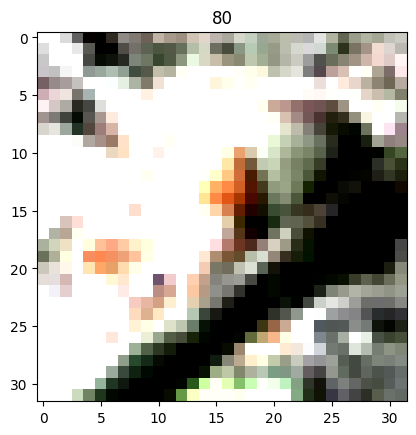

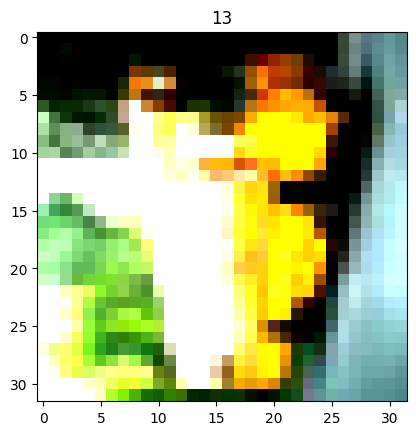

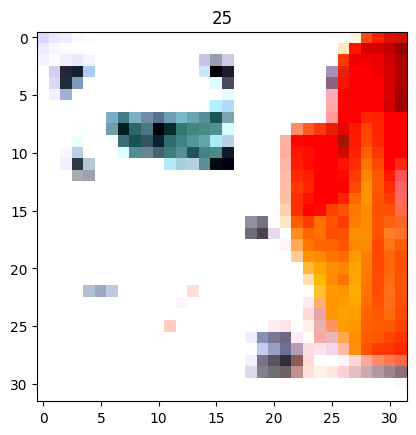

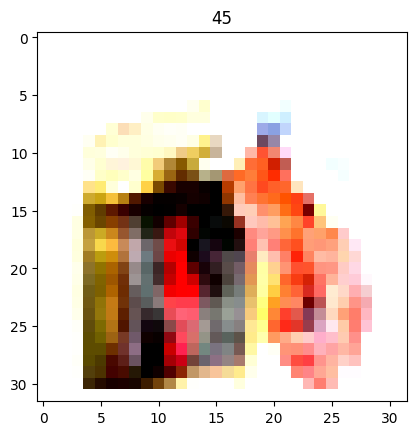

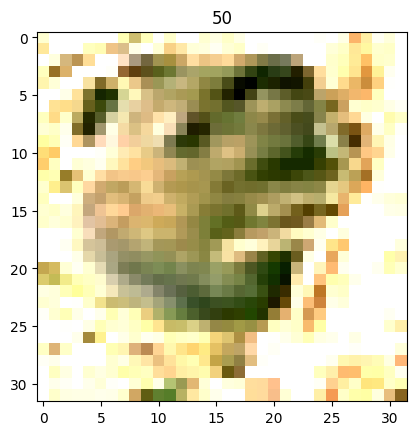

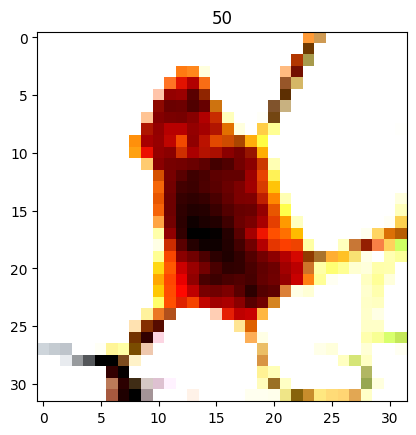

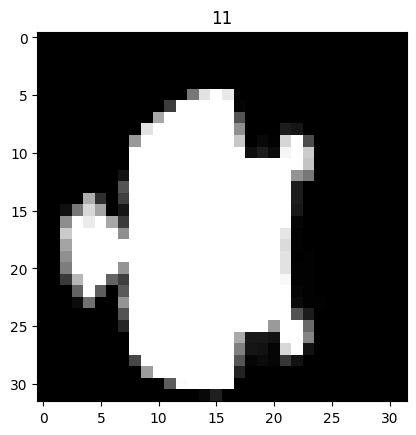

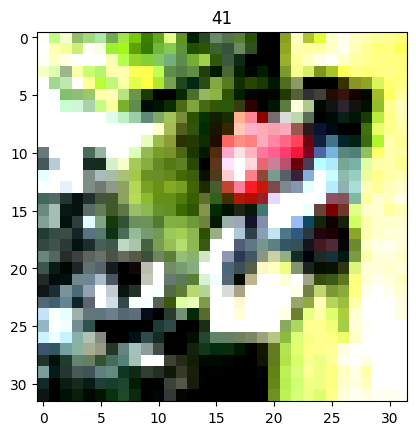

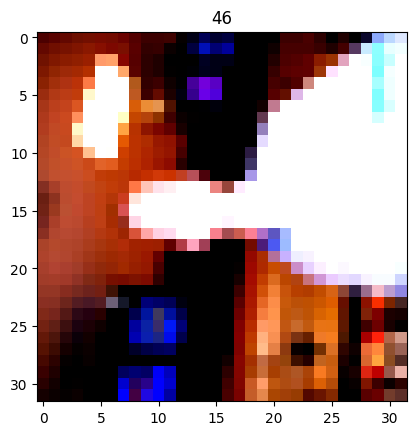

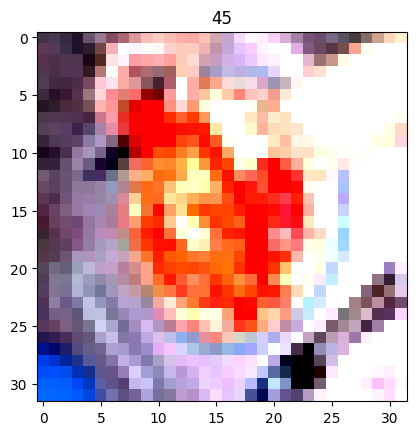

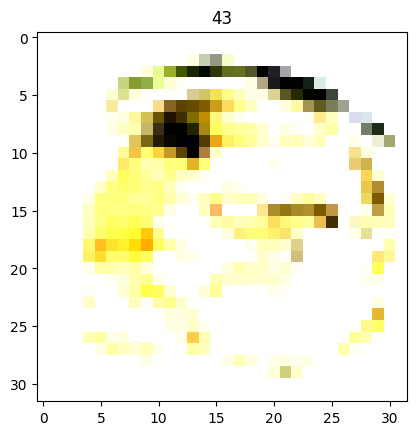

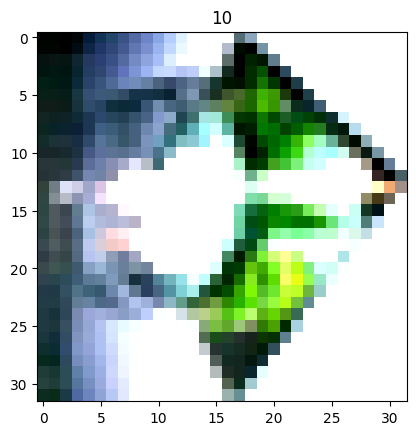

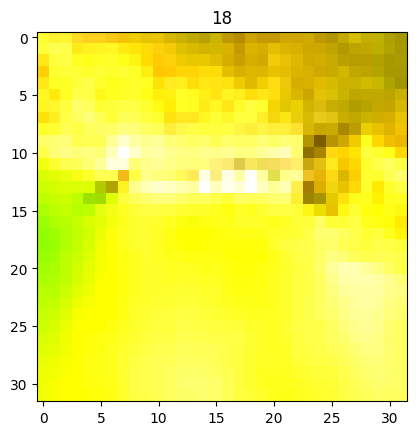

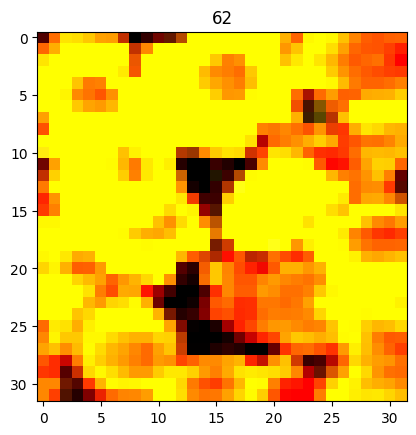

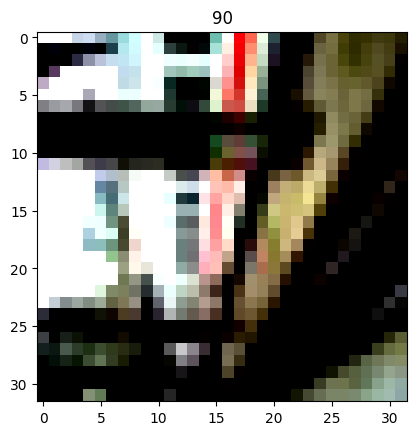

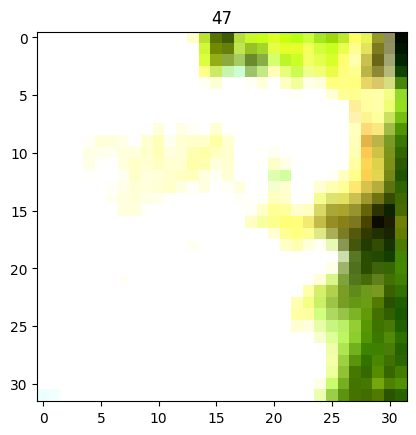

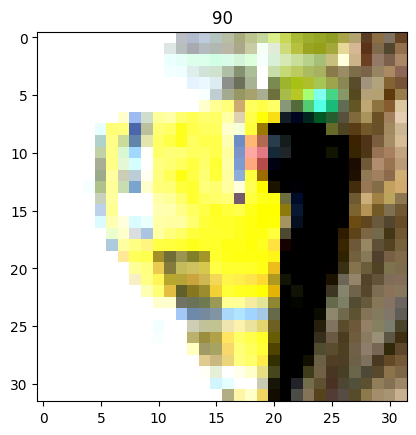

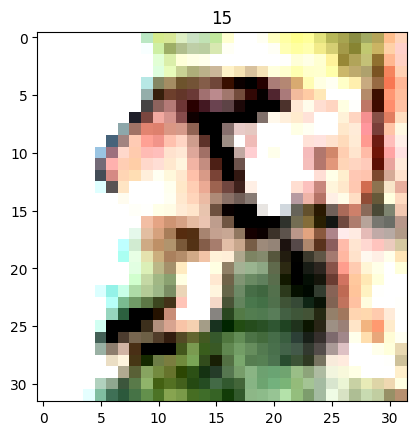

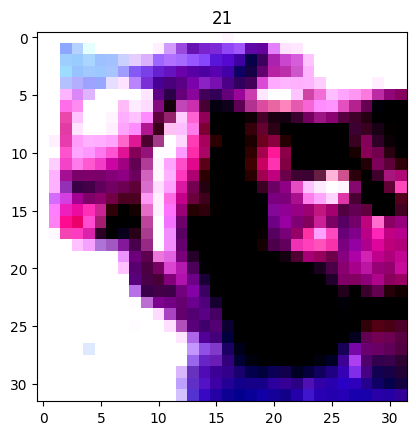

In [5]:
for i in range(20):
    plt.figure();
    plt.imshow(train_X[i, :, :, :].transpose(0, 2));
    plt.title(f"{train_y[i]}");